In [75]:
import numpy as np
import matplotlib.pylab as plt
from vtmm import tmm_rt

In [106]:
pol = 's'
c0 = 3e8
lambda0 = 193e-9
omega = np.array([2 * np.pi * c0 / lambda0])
kx = omega / c0 
n = np.array([1., 2.0, 1.])
d = np.array([66e-9])

In [107]:
def tmm(n, d):
    r, t = tmm_rt(pol, omega, kx, n, d)
    return r.numpy()[0, 0], t.numpy()[0, 0]

In [108]:
r, t = tmm(n, d)
print(f'r = {r:.2f}')
print(f'r = {t:.2f}')

r = -0.01-0.08j
r = -0.99+0.06j


In [147]:
lambdas = np.linspace(30, 2000, 10000) * 1e-9
omegas = 2 * np.pi * c0 / lambdas
kxs = omega / c0

rs, ts = tmm_rt(pol, omegas, kx, n, d)
rs = rs.numpy()[0, :]
ts = ts.numpy()[0, :]

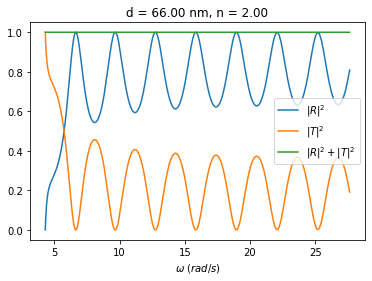

In [149]:
plt.plot(omegas / c0 * n[1] * d[0], np.abs(rs)**2, label='$|R|^2$')
plt.plot(omegas / c0 * n[1] * d[0], np.abs(ts)**2, label='$|T|^2$')
plt.plot(omegas / c0 * n[1] * d[0], np.abs(rs)**2 + np.abs(ts)**2, label='$|R|^2 + |T|^2$')
plt.xlabel('$\omega~(rad/s)$')
# plt.ylabel('$|a|^2$')
plt.legend()
plt.title(f'd = {(d[0]*1e9):.2f} nm, n = {(n[1]):.2f}')
plt.savefig('transmission', dpi=300)
plt.show()